# The Scikit-Learn API

In [12]:
%matplotlib notebook 

import random
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
class Estimator(object):
    
    def get_params(self):
        """
        Returns a dictionary of all hyperparams 
        """
        pass 

    def set_params(self, **params):
        """
        Sets hyperparams on the instance 
        """
        pass 

    def fit(self, X, y=None, **kwargs):
        """
        Fit the estimator from data
        """
        # Modify state of self 
        return self 

In [ ]:
class Predictor(Estimator):
    
    def predict(self, X, **kwargs):
        """
        Predict values for each row in X 
        """
        return y_hat

In [ ]:
class Model(Predictor):
    
    def score(self, X, y=None, **kwargs):
        """
        Return a score between 0 and 1
        """
        return score

In [ ]:
class Transformer(Estimator):
    
    def transform(self, X, **kwargs):
        """
        Modifies X and returns a new X' 
        """
        return X_prime

## Digits Example

In [5]:
# Load dataset 
from sklearn import datasets 
data = datasets.load_digits()

<IPython.core.display.Javascript object>


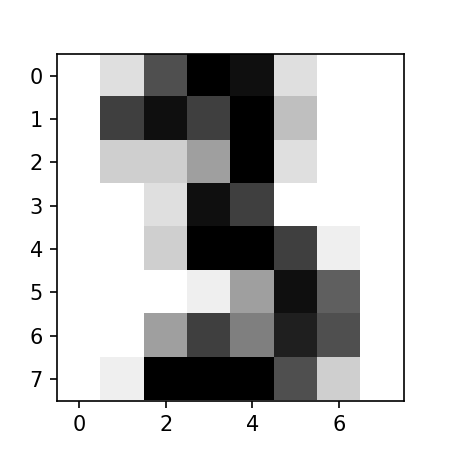

In [26]:
def show_instance(instance):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(instance, cmap=plt.cm.gray_r, interpolation='nearest')
    return ax

# Show random instance 
instance = random.choice(data.images)
_ = show_instance(instance)

### Fitting and Scoring Models

In [58]:
from sklearn.model_selection import train_test_split as tts 

# Identify our data and target 
X = data.data 
y = data.target

# Create random train and test splits
splits = tts(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [60]:
print("Training Data X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing Data X: {}, y: {}".format(X_test.shape, y_test.shape))

Training Data X: (1437, 64), y: (1437,)
Testing Data X: (360, 64), y: (360,)


In [101]:
# Fit a support vector classifier 
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
print(model.score(X_test, y_test))
model

0.497222222222


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
def predict_random(model, X=X, y=y):
    # Make a prediction on a random sample 
    idx = random.randint(0, len(X))
    g = show_instance(data.images[idx])
    yhat = model.predict([X[idx]])[0]
    ytrue = y[idx]

    print("Prediction: {} Actual: {} ({})".format(yhat, ytrue, model.__class__.__name__))
    return g 

<IPython.core.display.Javascript object>


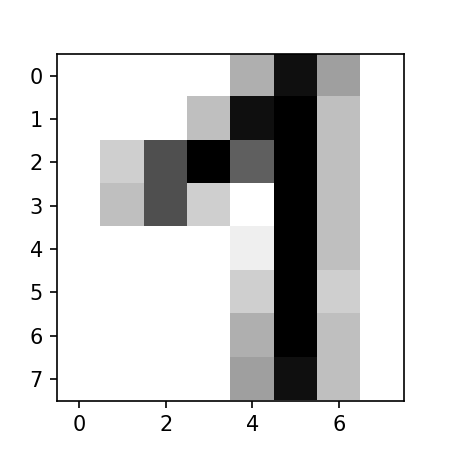

Prediction: 8 Actual: 1 (SVC)


In [84]:
predict_random(model)

In [100]:
# Fit a random forest classifier 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
print(model.score(X_test, y_test))
model

0.941666666667


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


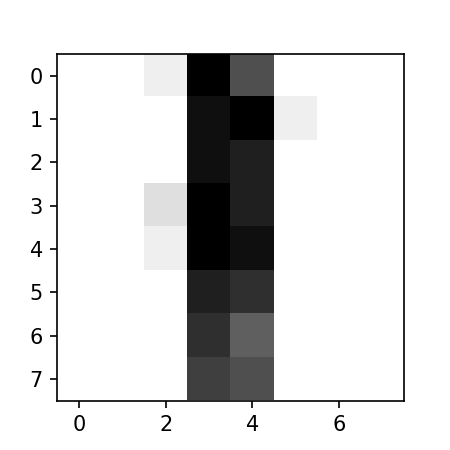

Prediction: 1 Actual: 1 (RandomForestClassifier)


In [86]:
predict_random(model)

In [102]:
from sklearn.metrics import classification_report 

y_hat = model.predict(X_test)
print(classification_report(y_test, y_hat))

             precision    recall  f1-score   support

          0       1.00      0.62      0.76        34
          1       1.00      0.38      0.55        32
          2       1.00      0.26      0.41        39
          3       1.00      0.46      0.63        39
          4       1.00      0.67      0.80        33
          5       1.00      0.34      0.51        41
          6       1.00      0.52      0.69        44
          7       1.00      0.55      0.71        33
          8       0.13      1.00      0.24        28
          9       1.00      0.35      0.52        37

avg / total       0.93      0.50      0.58       360



### &ldquo;Model Selection&rdquo;

In [93]:
import time 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [94]:
def fit_model(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    start = time.time()
    model.fit(X_train, y_train)
    duration = time.time() - start 
    score = model.score(X_test, y_test)
    
    print("{} fit in {:0.2f} seconds score: {:0.4f}".format(model.__class__.__name__, duration, score))
    print(model.get_params())

In [99]:
models = (
    LogisticRegression(), 
    SVC(),
    RandomForestClassifier(),
    Perceptron(), 
    KNeighborsClassifier(),
    KNeighborsClassifier(n_neighbors=15),
    KNeighborsClassifier(n_neighbors=2),
    GaussianNB(), 
    MultinomialNB(),
)

for model in models:
    fit_model(model)
    print()

LogisticRegression fit in 0.16 seconds score: 0.9722
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

SVC fit in 0.32 seconds score: 0.4972
{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': None, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

RandomForestClassifier fit in 0.03 seconds score: 0.9639
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_